In [1]:
import pandas as pd
from pandas import CategoricalDtype
import plotly.express as px
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, decomposition, metrics

mpl.rcParams["figure.figsize"] = (14, 7)
mpl.rcParams["figure.dpi"] = 140

In [2]:
df = pd.read_csv("data/to_analysis_v2.csv")
df_estados_regioes = pd.read_csv(
    "data/estados_regioes.csv"
)  # de-para das regiões brasileiras utilizado mais abaixo da análise

In [3]:
df.columns

Index(['contrato_id', 'total_success_dsp5', 'total_success_dsp10',
       'total_success_dsp15', 'total_success_dsp30', 'total_success_dsp60',
       'total_success_dsp90', 'prop_success_dsp5', 'prop_success_dsp10',
       'prop_success_dsp15', 'prop_success_dsp30', 'prop_success_dsp60',
       'prop_success_dsp90', 'total_success_dspp15', 'total_success_dspp30',
       'total_success_dspp45', 'prop_success_dspp15', 'prop_success_dspp30',
       'prop_success_dspp45', 'score_dsp', 'score_dspp', 'mean_dsp_contrato',
       'mean_dspp_contrato', 'vlr_saldo_devedor_esperado', 'nr_documento',
       'tipo_empresa', 'cidade', 'estado', 'subsegmento', 'segmento',
       '('qtd_transacoes', 'mean')', '('qtd_transacoes', 'min')',
       '('qtd_transacoes', 'max')', '('qtd_transacoes', 'median')',
       '('qtd_transacoes', 'sum')', '('vlr_tpv', 'mean')',
       '('vlr_tpv', 'min')', '('vlr_tpv', 'max')', '('vlr_tpv', 'median')',
       '('vlr_tpv', 'sum')'],
      dtype='object')

# Scores vs Segmento e Subsegmento (DSP e DSPP)

In [4]:
segmentos = [
    "Alimentação",
    "Varejo",
    "Bens duráveis",
    "Serviços recorrentes",
    "Viagens e entretenimento",
    "Serviços",
    "Supermercado/Farmácia",
    "Posto",
    "Outros",
]
subsegmentos = [
    "Academias",
    "Alimentação Rápida",
    "Atacadista de Alimento",
    "Atacadistas Gerais",
    "Automotivo",
    "Bares e Restaurantes",
    "Educação",
    "Lazer & Turismo",
    "Lojas Diversas",
    "Material de Construção",
    "None",
    "Outros",
    "Postos de Gasolina",
    "Saúde",
    "Supermercados",
    "Vestuário",
]

In [5]:
# intially by the dsp
df_filtered = df[["nr_documento", "score_dsp", "segmento"]][
    (df["segmento"].isin(segmentos)) & (df["subsegmento"].isin(subsegmentos))
]

In [6]:
fig = px.box(df_filtered, x="segmento", y="score_dsp")
fig.show()

In [7]:
# intially by the dsp
df_filtered = df[["nr_documento", "score_dsp", "subsegmento"]][
    (df["segmento"].isin(segmentos)) & (df["subsegmento"].isin(subsegmentos))
]

fig = px.box(df_filtered, x="subsegmento", y="score_dsp")
fig.show()

In [8]:
# intially by the dsp
df_filtered = df[
    [
        "nr_documento",
        "score_dspp",
        "segmento",
        "subsegmento",
        "mean_dsp_contrato",
        "mean_dspp_contrato",
    ]
][(df["segmento"].isin(segmentos)) & (df["subsegmento"].isin(subsegmentos))]

fig = px.box(df_filtered, x="segmento", y="score_dspp")
fig.show()

fig = px.box(df_filtered, x="subsegmento", y="score_dspp")
fig.show()

fig = px.box(df_filtered, x="segmento", y="mean_dsp_contrato")
fig.show()

fig = px.box(df_filtered, x="segmento", y="mean_dspp_contrato")
fig.show()

fig = px.box(df_filtered, x="subsegmento", y="mean_dsp_contrato")
fig.show()

fig = px.box(df_filtered, x="subsegmento", y="mean_dspp_contrato")
fig.show()

# Scores vs Acionamento

In [9]:
df.columns

Index(['contrato_id', 'total_success_dsp5', 'total_success_dsp10',
       'total_success_dsp15', 'total_success_dsp30', 'total_success_dsp60',
       'total_success_dsp90', 'prop_success_dsp5', 'prop_success_dsp10',
       'prop_success_dsp15', 'prop_success_dsp30', 'prop_success_dsp60',
       'prop_success_dsp90', 'total_success_dspp15', 'total_success_dspp30',
       'total_success_dspp45', 'prop_success_dspp15', 'prop_success_dspp30',
       'prop_success_dspp45', 'score_dsp', 'score_dspp', 'mean_dsp_contrato',
       'mean_dspp_contrato', 'vlr_saldo_devedor_esperado', 'nr_documento',
       'tipo_empresa', 'cidade', 'estado', 'subsegmento', 'segmento',
       '('qtd_transacoes', 'mean')', '('qtd_transacoes', 'min')',
       '('qtd_transacoes', 'max')', '('qtd_transacoes', 'median')',
       '('qtd_transacoes', 'sum')', '('vlr_tpv', 'mean')',
       '('vlr_tpv', 'min')', '('vlr_tpv', 'max')', '('vlr_tpv', 'median')',
       '('vlr_tpv', 'sum')'],
      dtype='object')

In [10]:
df[["mean_dsp_contrato", "mean_dspp_contrato"]]

mean_dsp_contrato  mean_dspp_contrato
0               1.500000                 NaN
1               1.333333            1.000000
2               1.636364            1.000000
3               1.416667            1.750000
4               1.000000            1.666667
...                  ...                 ...
12197           1.000000                 NaN
12198           1.500000                 NaN
12199           1.555556            1.272727
12200           1.750000                 NaN
12201                NaN            1.000000

[12202 rows x 2 columns]

# Proporção de sucesso por aplicação de filtros

In [11]:
filtro_estado = "SP"
filtro_cidade = "São Paulo"
prop_columns = [column for column in df.columns if column.startswith("prop_")]

df_filtered = df[(df["estado"] == filtro_estado) & (df["cidade"] == filtro_cidade)][
    prop_columns
]
df_melted = df_filtered.melt(value_vars=prop_columns, var_name="props")
to_plot = df_melted.groupby(["props"])["value"].agg(np.nanmedian).reset_index()

In [12]:
prop_categories = CategoricalDtype(
    [
        "prop_success_dsp5",
        "prop_success_dsp10",
        "prop_success_dsp15",
        "prop_success_dsp30",
        "prop_success_dsp60",
        "prop_success_dsp90",
        "prop_success_dspp15",
        "prop_success_dspp30",
        "prop_success_dspp45",
    ],
    ordered=True,
)
to_plot["props"] = to_plot["props"].astype(prop_categories)
to_plot_sorted = to_plot.sort_values("props")

In [13]:
fig = px.bar(to_plot_sorted, x="props", y="value")
fig.show()

# Correlation

Will come back latter with the final dataset.

In [14]:
fig = px.imshow(df.corr())
fig.show()

Para análise, nós vamos nesse primeiro momento remover as features de proporção, e manter os totais. Isso por que vamos precisar realizar uma clusterização logo mais, e os missings dessa feature seria um problema.

In [15]:
prop_columns = [column for column in df.columns if column.startswith("prop_")]

# dropping prop columns
df_analysis_wo_prop = df.drop(prop_columns, axis=1)

Nosso dataset possui alguns valores missings que precisarão ser tratados. Aqui vemos que existem missings tanto no DSP quanto no DSPP, por isso a análise a seguir vai precisar acontecer separadamente entre DSP e DSPP.

Vamos começar pelo DSP.

In [16]:
df_analysis_wo_prop.isnull().sum()

contrato_id                        0
total_success_dsp5                 0
total_success_dsp10                0
total_success_dsp15                0
total_success_dsp30                0
total_success_dsp60                0
total_success_dsp90                0
total_success_dspp15               0
total_success_dspp30               0
total_success_dspp45               0
score_dsp                       1126
score_dspp                      1968
mean_dsp_contrato               1126
mean_dspp_contrato              1992
vlr_saldo_devedor_esperado         0
nr_documento                       0
tipo_empresa                       0
cidade                             0
estado                             0
subsegmento                        0
segmento                           0
('qtd_transacoes', 'mean')         6
('qtd_transacoes', 'min')          6
('qtd_transacoes', 'max')          6
('qtd_transacoes', 'median')       6
('qtd_transacoes', 'sum')          6
('vlr_tpv', 'mean')                6
(

Identificando features do DSP

In [17]:
# I'll do dsp and dspp seperate
dspp_columns = [column for column in df_analysis_wo_prop.columns if "dspp" in column]
df_analysis_dsp = df_analysis_wo_prop.drop(dspp_columns, axis=1)
df_analysis_dsp

contrato_id  total_success_dsp5  \
0      000180509391a5ac66ff83cae603ffb8                   1   
1      000c35a61297edadc2842f6d5b4028e1                   4   
2      bcd244d93204f40ca32f55fa2b06ca1f                   2   
3      000dcdc93a545ee45a1aee85ef85c34a                  10   
4      0014cccd47b66a47af4e62c4dcbe95f1                   2   
...                                 ...                 ...   
12197  fff4bf15d5b48a5c1bda798ea77290d1                   1   
12198  fff6edc99168d63a10ea51a7f808ff38                   3   
12199  fffb0d6ec51d163ca8c69900f748d61b                   4   
12200  fffb47b9ce3835c85513ef5b19165f6e                   1   
12201  fffc9af28349e8ded3af8e2dcbf9c3bc                   0   

       total_success_dsp10  total_success_dsp15  total_success_dsp30  \
0                        1                    0                    0   
1                        1                    1                    1   
2                        2                    2                    2   
3                        6                    5                    2   
4                        1                    1                    0   
...                    ...                  ...                  ...   
12197                    0                    0                    0   
12198                    1                    0                    0   
12199                    3                    2                    0   
12200                    1                    1                    1   
12201                    0                    0                    0   

       total_success_dsp60  total_success_dsp90  score_dsp  mean_dsp_contrato  \
0                        0                    0   0.500000           1.500000   
1                        1                    1   0.291667           1.333333   
2                        2                    1   0.000000           1.636364   
3                        1                    0   0.373333           1.416667   
4                        0                    0   0.333333           1.000000   
...                    ...                  ...        ...                ...   
12197                    0                    0   1.000000           1.000000   
12198                    0                    0   0.833333           1.500000   
12199                    0                    0   0.527778           1.555556   
12200                    0                    0   0.250000           1.750000   
12201                    0                    0        NaN                NaN   

       vlr_saldo_devedor_esperado  ... ('qtd_transacoes', 'mean')  \
0                         6924.81  ...                  12.357995   
1                        33986.65  ...                  15.026616   
2                         4847.02  ...                  15.026616   
3                         1861.91  ...                   1.500000   
4                        16623.37  ...                   5.033784   
...                           ...  ...                        ...   
12197                     2271.43  ...                   1.556213   
12198                     6808.42  ...                   1.991489   
12199                   136579.63  ...                  46.116992   
12200                    38500.32  ...                  45.919118   
12201                    32874.80  ...                   4.241463   

      ('qtd_transacoes', 'min') ('qtd_transacoes', 'max')  \
0                           1.0                      42.0   
1                           1.0                      66.0   
2                           1.0                      66.0   
3                           1.0                       5.0   
4                           1.0                      13.0   
...                         ...                       ...   
12197                       1.0                       5.0   
12198                       1.0                       7.0   
12199                       2.0                     199

In [18]:
df_analysis_dsp_no_missing = df_analysis_dsp.dropna(
    subset=["score_dsp", "('qtd_transacoes', 'mean')"]
)

Agora sim, temos um dataset sem missings, para poder trabalhar. Nesse ponto, queremos investigar quais features de fato contribuem para encontrar a melhor curva. E por isso, entendemos que nesse momento o contrato pode ficar de fora.

In [19]:
# our final dataset to use
contrato_ids = df_analysis_dsp_no_missing["contrato_id"]
df_analysis_dsp_no_missing_use = df_analysis_dsp_no_missing.drop(
    ["contrato_id"], axis=1
)

Antes de prosseguir, vamos rodar um gráfico de correlação, para termos um indicativo de quais features contribuem mais para nossa feature de interesse (score_dsp).

In [20]:
fig = px.imshow(df_analysis_dsp_no_missing_use.corr())
fig.show()

Veja que aqui nós temos uma clusterização dentre as features mais pro final do dataset, mas que nenhuma delas possui uma correlação interessante para o score_dsp. Portanto, nesse primeiro momento, não iremos considerá-los.

In [21]:
df_dropped_no_correlation_features = df_analysis_dsp_no_missing_use.iloc[:, 0:15]

Até então, o que conseguimos ver é que o score_dsp está muito bem correlacionado com as features de total de sucesso nos diferentes acionamentos. E ainda mais, essa correlação é negativa, quanto maior o score_dsp menor é a quantidade de vezes de sucesso de acionamento.

Isso por que de fato, a maioria dos melhores scores_dsp foram observados com menores taxas de sucesso, já que o cliente foi acionado muito poucas vezes. Mas ainda precisamos entender os grupos onde isso aconteceu.

Um outro ponto importante é que, aqui não vamos considerar cidades, por ser uma informação muito granular. Vamos aqui trazer a informação sobre regiões do Brasil no lugar das cidades e Estados.

In [22]:
df_dropped_no_correlation_features.head()

total_success_dsp5  total_success_dsp10  total_success_dsp15  \
0                   1                    1                    0   
1                   4                    1                    1   
2                   2                    2                    2   
3                  10                    6                    5   
4                   2                    1                    1   

   total_success_dsp30  total_success_dsp60  total_success_dsp90  score_dsp  \
0                    0                    0                    0   0.500000   
1                    1                    1                    1   0.291667   
2                    2                    2                    1   0.000000   
3                    2                    1                    0   0.373333   
4                    0                    0                    0   0.333333   

   mean_dsp_contrato  vlr_saldo_devedor_esperado  \
0           1.500000                     6924.81   
1           1.333333                    33986.65   
2           1.636364                     4847.02   
3           1.416667                     1861.91   
4           1.000000                    16623.37   

                       nr_documento tipo_empresa     cidade estado  \
0  7996daab1bbe000bb5d1cc1bf317f390          MEI     Cuiabá     MT   
1  1191ebfa94d3ca2e8a02f696aafde4a4           PF  São Paulo     SP   
2  1191ebfa94d3ca2e8a02f696aafde4a4           PF  São Paulo     SP   
3  cd1178c3ed53ebe730ba521617cb574b           PF   Camaçari     BA   
4  40cd8202c632fef1e0d5f43f341990a7           PF      Serra     ES   

              subsegmento       segmento  
0      Alimentação Rápida    Alimentação  
1          Lojas Diversas         Varejo  
2          Lojas Diversas         Varejo  
3  Material de Construção  Bens duráveis  
4          Lojas Diversas         Varejo

In [23]:
def get_region(x):
    if isinstance(x, str):
        try:
            region = df_estados_regioes[df_estados_regioes["uf"] == x]["regiao"].values
            return region[0]
        except:
            return x
    return x


df_dropped_no_correlation_features["region"] = df_dropped_no_correlation_features[
    "estado"
].apply(get_region)

Como não vamos utilizar nessa análise cidade e estado, vamos dropar essas features.

In [24]:
df_dropped_no_correlation_features.drop(["cidade", "estado"], axis=1, inplace=True)

Como tivemos alguns agrupamentos, vamos disconsiderar os grupos de segmentos e subsegmentos que aparecem nas colunas.

In [25]:
# keep just strings, clean lists
df_dropped_no_correlation_features.value_counts(["segmento"])

segmento                                                
Alimentação                                                 3786
Varejo                                                      2167
Serviços                                                    1897
Bens duráveis                                               1748
Supermercado/Farmácia                                        772
Serviços recorrentes                                         266
Viagens e entretenimento                                     159
Posto                                                        117
Outros                                                        44
['Varejo', 'Varejo']                                          18
['Bens duráveis', 'Bens duráveis']                            14
['Serviços', 'Serviços']                                      12
['Alimentação', 'Alimentação']                                11
['Varejo', 'Alimentação']                                      7
['Varejo', 'Serviços']           

In [26]:
# remove lists too
df_dropped_no_correlation_features.value_counts(["subsegmento"])  # 68

subsegmento                           
Alimentação Rápida                        2143
Lojas Diversas                            2063
Outros                                    1346
Bares e Restaurantes                       974
Automotivo                                 909
                                          ... 
['Lojas Diversas', 'Lazer & Turismo']        1
['Automotivo', 'Lojas Diversas']             1
['Lazer & Turismo', 'Lazer & Turismo']       1
['Educação', 'Outros']                       1
['Bares e Restaurantes', 'None']             1
Length: 67, dtype: int64

In [27]:
categorical_variables = df_dropped_no_correlation_features.select_dtypes(
    include=object
).columns
new_categorical_variables = [feature + "_new" for feature in categorical_variables]
df_analysis_dsp_no_missing_use_copy = df_dropped_no_correlation_features.copy()

for i, feature in enumerate(categorical_variables):
    print(feature)
    df_analysis_dsp_no_missing_use_copy[
        new_categorical_variables[i]
    ] = df_dropped_no_correlation_features[feature].apply(
        lambda x: None if len(x.split(",")) > 1 else x
    )

# df_analysis_dsp_no_missing_use.value_counts(["subsegmento_clean"])

nr_documento
tipo_empresa
subsegmento
segmento
region


In [28]:
df_analysis_dsp_no_missing_use_copy.drop(categorical_variables, axis=1, inplace=True)

In [29]:
df_analysis_dsp_no_missing_use_copy.columns

Index(['total_success_dsp5', 'total_success_dsp10', 'total_success_dsp15',
       'total_success_dsp30', 'total_success_dsp60', 'total_success_dsp90',
       'score_dsp', 'mean_dsp_contrato', 'vlr_saldo_devedor_esperado',
       'nr_documento_new', 'tipo_empresa_new', 'subsegmento_new',
       'segmento_new', 'region_new'],
      dtype='object')

Dropando NAs

In [30]:
df_analysis_dsp_no_missing_use_copy.dropna(subset=["tipo_empresa_new"], inplace=True)

In [31]:
# dropando features
df_analysis_dsp_no_missing_use_copy.drop(["nr_documento_new"], axis=1, inplace=True)

In [32]:
df_analysis_dsp_no_missing_use_copy.columns

Index(['total_success_dsp5', 'total_success_dsp10', 'total_success_dsp15',
       'total_success_dsp30', 'total_success_dsp60', 'total_success_dsp90',
       'score_dsp', 'mean_dsp_contrato', 'vlr_saldo_devedor_esperado',
       'tipo_empresa_new', 'subsegmento_new', 'segmento_new', 'region_new'],
      dtype='object')

In [33]:
# vamos simplificar subsegmento e segmento
segmentos_to_group_outros = [
    "Serviços recorrentes",
    "Viagens e entretenimento",
    "Posto",
]
subsegmentos_to_group_outros = [
    "Academias",
    "Atacadista de Alimento",
    "Educação",
    "Lazer & Turismo",
    "Material de Construção",
    "None",
    "Postos de Gasolina",
]

In [34]:
df_analysis_dsp_no_missing_use_copy["subsegmento_new"].apply(
    lambda x: "Outros" if x in subsegmentos_to_group_outros else x
)
df_analysis_dsp_no_missing_use_copy["segmento_new"].apply(
    lambda x: "Outros" if x in segmentos_to_group_outros else x
)

0          Alimentação
1               Varejo
2               Varejo
3        Bens duráveis
4               Varejo
             ...      
12196      Alimentação
12197    Bens duráveis
12198         Serviços
12199      Alimentação
12200      Alimentação
Name: segmento_new, Length: 10956, dtype: object

In [35]:
df_analysis_dsp_no_missing_use_copy["segmento_new"].value_counts()

Alimentação                 3786
Varejo                      2167
Serviços                    1897
Bens duráveis               1748
Supermercado/Farmácia        772
Serviços recorrentes         266
Viagens e entretenimento     159
Posto                        117
Outros                        44
Name: segmento_new, dtype: int64

In [36]:
df_analysis_dsp_no_missing_use_copy["subsegmento_new"].value_counts()

Alimentação Rápida        2143
Lojas Diversas            2063
Outros                    1346
Bares e Restaurantes       974
Automotivo                 909
Vestuário                  907
Supermercados              732
Saúde                      578
Material de Construção     392
Atacadistas Gerais         332
Educação                   181
Postos de Gasolina         116
Academias                  102
Lazer & Turismo             93
None                        49
Atacadista de Alimento      39
Name: subsegmento_new, dtype: int64

In [37]:
numerical_variables = df_analysis_dsp_no_missing_use_copy.select_dtypes(exclude=object)
cat_variables = df_analysis_dsp_no_missing_use_copy.select_dtypes(include=object)

# Clustering

In [38]:
from sklearn.preprocessing import StandardScaler

preprocessor = StandardScaler()
df_analysis_transformed = preprocessor.fit_transform(numerical_variables)
numerical_transformed = pd.DataFrame(
    df_analysis_transformed, columns=preprocessor.get_feature_names_out()
)
numerical_transformed

total_success_dsp5  total_success_dsp10  total_success_dsp15  \
0               -0.794943            -0.450263            -0.772185   
1               -0.287097            -0.450263            -0.212287   
2               -0.625661            -0.051598             0.347611   
3                0.728596             1.543061             2.027304   
4               -0.625661            -0.450263            -0.212287   
...                   ...                  ...                  ...   
10951           -0.117815            -0.450263            -0.772185   
10952           -0.794943            -0.848927            -0.772185   
10953           -0.456379            -0.450263            -0.772185   
10954           -0.287097             0.347067             0.347611   
10955           -0.794943            -0.450263            -0.212287   

       total_success_dsp30  total_success_dsp60  total_success_dsp90  \
0                -0.704912            -0.607845            -0.541077   
1                 0.251499             0.995706             1.386742   
2                 1.207910             2.599256             1.386742   
3                 1.207910             0.995706            -0.541077   
4                -0.704912            -0.607845            -0.541077   
...                    ...                  ...                  ...   
10951             0.251499            -0.607845            -0.541077   
10952            -0.704912            -0.607845            -0.541077   
10953            -0.704912            -0.607845            -0.541077   
10954            -0.704912            -0.607845            -0.541077   
10955             0.251499            -0.607845            -0.541077   

       score_dsp  mean_dsp_contrato  vlr_saldo_devedor_esperado  
0      -0.250455           0.172590                   -0.619945  
1      -0.878872          -0.424961                    0.045247  
2      -1.758656           0.661496                   -0.671018  
3      -0.632533          -0.126185                   -0.744394  
4      -0.753189          -1.620064                   -0.381550  
...          ...                ...                         ...  
10951   0.051185           0.428684                    2.867716  
10952   1.257746          -1.620064                   -0.734328  
10953   0.755012           0.172590                   -0.622806  
10954  -0.166666           0.371774                    2.567031  
10955  -1.004556           1.068918                    0.156196  

[10956 rows x 9 columns]

In [39]:
# one hot on categorical vars
from sklearn.preprocessing import OneHotEncoder

# lets drop nr_documento, not relevent right now
# categorical_variables.drop(["nr_documento"], axis=1, inplace=True)

ohe = OneHotEncoder(sparse=False)
df_analysis_cat_trans = ohe.fit_transform(cat_variables)
categorical_transformed = pd.DataFrame(
    df_analysis_cat_trans, columns=ohe.get_feature_names_out()
)
categorical_transformed

tipo_empresa_new_MEI  tipo_empresa_new_PF  tipo_empresa_new_PJ  \
0                       1.0                  0.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  1.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  1.0                  0.0   
...                     ...                  ...                  ...   
10951                   0.0                  0.0                  1.0   
10952                   1.0                  0.0                  0.0   
10953                   1.0                  0.0                  0.0   
10954                   0.0                  0.0                  1.0   
10955                   0.0                  0.0                  1.0   

       subsegmento_new_Academias  subsegmento_new_Alimentação Rápida  \
0                            0.0                                 1.0   
1                            0.0                                 0.0   
2                            0.0                                 0.0   
3                            0.0                                 0.0   
4                            0.0                                 0.0   
...                          ...                                 ...   
10951                        0.0                                 1.0   
10952                        0.0                                 0.0   
10953                        0.0                                 0.0   
10954                        0.0                                 1.0   
10955                        0.0                                 0.0   

       subsegmento_new_Atacadista de Alimento  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
10951                                     0.0   
10952                                     0.0   
10953                                     0.0   
10954                                     0.0   
10955                                     0.0   

       subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
10951                                 0.0                         0.0   
10952                                 0.0                         0.0   
10953                                 0.0                         1.0   
10954                                 0.0                         0.0   
10955                                 0.0                         0.0   

       subsegmento_new_Bares e Restaurantes  subsegmento_new_Educação  ...  \
0                                       0.0                       0.0  ...   
1                                       0.0                       0.0  ...   
2                                       0.0                       0.0  ...   
3                                       0.0                       0.0  ...   
4                                       0.0                       0.0  ...   
...                                     ...                       ...  ...   
10951                                   0.0                       0.0  ...   
10952                                   0.0                       0.0  ...   
10953                                   0.0                       0.0  ...   
10954              

In [40]:
# join all the data
df_modeling = pd.concat([categorical_transformed, numerical_transformed], axis=1)
df_modeling.shape

(10956, 43)

In [41]:
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

score_lst = []
for n_cluster in clusters:
    cluster_kmeans = cluster.KMeans(n_clusters=n_cluster).fit(df_modeling)
    preds = cluster_kmeans.predict(df_modeling)
    centers = cluster_kmeans.cluster_centers_
    score = metrics.silhouette_score(df_modeling, preds, metric="euclidean")
    score_lst.append(metrics.silhouette_score(df_modeling, preds, metric="euclidean"))
    print("For n cluster: {}. The avg silhouette_score is {}".format(n_cluster, score))

For n cluster: 2. The avg silhouette_score is 0.20647107776378396
For n cluster: 3. The avg silhouette_score is 0.19818621030635375
For n cluster: 4. The avg silhouette_score is 0.13330877706247835
For n cluster: 5. The avg silhouette_score is 0.12792579434273071
For n cluster: 6. The avg silhouette_score is 0.1306120680744093
For n cluster: 7. The avg silhouette_score is 0.13667500274822586
For n cluster: 8. The avg silhouette_score is 0.13661834870814946
For n cluster: 9. The avg silhouette_score is 0.1121245371351375
For n cluster: 10. The avg silhouette_score is 0.11253915119874083


In [42]:
# seems that 4 clusters are better
clusters = cluster.KMeans(n_clusters=4).fit(df_modeling)
preds = clusters.predict(df_modeling)
preds

array([1, 0, 0, ..., 1, 1, 2], dtype=int32)

In [43]:
df_modeling["clusters"] = preds
df_modeling.drop(["clusters"], axis=1, inplace=True)

In [44]:
# creating PCA analysis too
pca = decomposition.PCA(n_components=2)
orders_to_cluster_components = pca.fit_transform(df_modeling)
orders_to_cluster_components_df = pd.DataFrame(
    orders_to_cluster_components, columns=["pc1", "pc2"]
)
orders_to_cluster_components_df

pc1       pc2
0     -1.409415 -0.400231
1      0.879368 -1.688940
2      2.529668 -2.401140
3      2.707233  1.248736
4     -0.928659 -0.352131
...         ...       ...
10951 -0.871521 -0.531059
10952 -2.020037  0.206837
10953 -1.603900  0.371515
10954 -0.451335 -0.064141
10955 -0.476636 -0.736527

[10956 rows x 2 columns]

In [45]:
orders_to_cluster_components_df["clusters"] = preds
orders_to_cluster_components_df

pc1       pc2  clusters
0     -1.409415 -0.400231         1
1      0.879368 -1.688940         0
2      2.529668 -2.401140         0
3      2.707233  1.248736         3
4     -0.928659 -0.352131         1
...         ...       ...       ...
10951 -0.871521 -0.531059         1
10952 -2.020037  0.206837         1
10953 -1.603900  0.371515         1
10954 -0.451335 -0.064141         1
10955 -0.476636 -0.736527         2

[10956 rows x 3 columns]

In [46]:
# copied from kaggle
def pca_results(good_data, pca):
    """
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    """

    # Dimension indexing
    dimensions = ["Dimension {}".format(i) for i in range(1, len(pca.components_) + 1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns=good_data.keys())
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns=["Explained Variance"])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot the feature weights as a function of the components
    components.plot(ax=ax, kind="bar")
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(
            i - 0.40,
            ax.get_ylim()[1] + 0.05,
            "Explained Variance\n          %.4f" % (ev),
        )

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis=1)

Explained Variance  tipo_empresa_new_MEI  tipo_empresa_new_PF  \
Dimension 1              0.2898                0.0082               0.0036   
Dimension 2              0.1399                0.0115              -0.0036   

             tipo_empresa_new_PJ  subsegmento_new_Academias  \
Dimension 1              -0.0118                    -0.0005   
Dimension 2              -0.0079                     0.0017   

             subsegmento_new_Alimentação Rápida  \
Dimension 1                             -0.0138   
Dimension 2                             -0.0295   

             subsegmento_new_Atacadista de Alimento  \
Dimension 1                                 -0.0005   
Dimension 2                                 -0.0005   

             subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
Dimension 1                              0.0029                      0.0031   
Dimension 2                              0.0053                      0.0246   

             subsegmento_new_Bares e Restaurantes  ...  region_new_Sul  \
Dimension 1                               -0.0019  ...         -0.0070   
Dimension 2                               -0.0140  ...          0.0092   

             total_success_dsp5  total_success_dsp10  total_success_dsp15  \
Dimension 1              0.2570               0.4177               0.4496   
Dimension 2              0.5248               0.3905               0.2514   

             total_success_dsp30  total_success_dsp60  total_success_dsp90  \
Dimension 1               0.4517               0.3786               0.3269   
Dimension 2              -0.0213              -0.3514              -0.4179   

             score_dsp  mean_dsp_contrato  vlr_saldo_devedor_esperado  
Dimension 1    -0.3191             0.0061                      0.0103  
Dimension 2     0.4157            -0.0012                     -0.1674  

[2 rows x 44 columns]

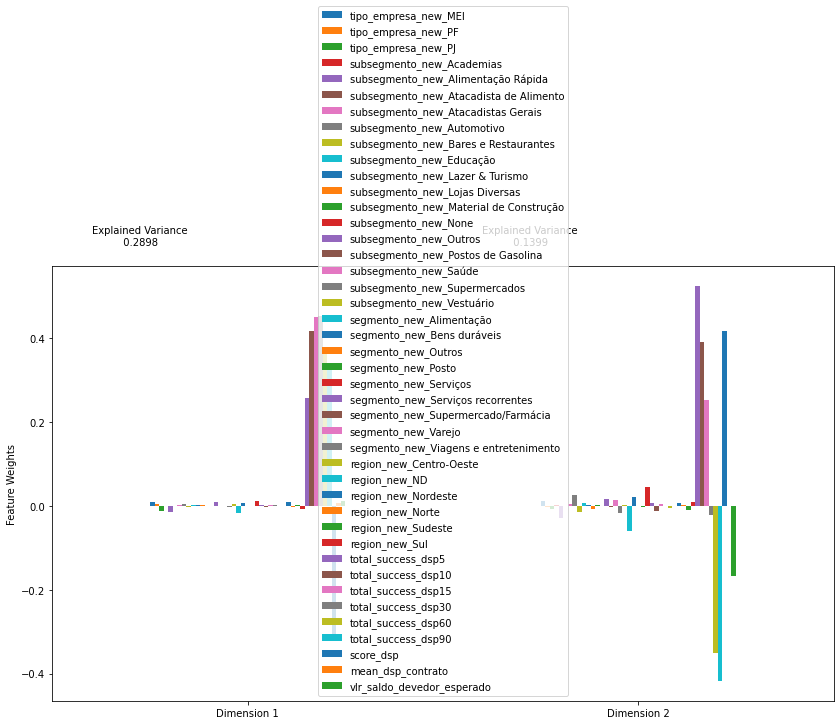

In [47]:
pca_results(df_modeling, pca)

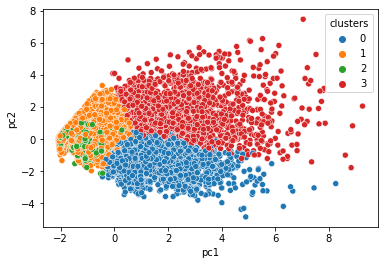

In [48]:
_ = sns.scatterplot(
    x="pc1",
    y="pc2",
    data=orders_to_cluster_components_df,
    hue="clusters",
    palette=sns.color_palette("tab10", 4),
)
plt.show()

In [49]:
orders_to_cluster_components_df

pc1       pc2  clusters
0     -1.409415 -0.400231         1
1      0.879368 -1.688940         0
2      2.529668 -2.401140         0
3      2.707233  1.248736         3
4     -0.928659 -0.352131         1
...         ...       ...       ...
10951 -0.871521 -0.531059         1
10952 -2.020037  0.206837         1
10953 -1.603900  0.371515         1
10954 -0.451335 -0.064141         1
10955 -0.476636 -0.736527         2

[10956 rows x 3 columns]

In [50]:
df_modeling

tipo_empresa_new_MEI  tipo_empresa_new_PF  tipo_empresa_new_PJ  \
0                       1.0                  0.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  1.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  1.0                  0.0   
...                     ...                  ...                  ...   
10951                   0.0                  0.0                  1.0   
10952                   1.0                  0.0                  0.0   
10953                   1.0                  0.0                  0.0   
10954                   0.0                  0.0                  1.0   
10955                   0.0                  0.0                  1.0   

       subsegmento_new_Academias  subsegmento_new_Alimentação Rápida  \
0                            0.0                                 1.0   
1                            0.0                                 0.0   
2                            0.0                                 0.0   
3                            0.0                                 0.0   
4                            0.0                                 0.0   
...                          ...                                 ...   
10951                        0.0                                 1.0   
10952                        0.0                                 0.0   
10953                        0.0                                 0.0   
10954                        0.0                                 1.0   
10955                        0.0                                 0.0   

       subsegmento_new_Atacadista de Alimento  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
10951                                     0.0   
10952                                     0.0   
10953                                     0.0   
10954                                     0.0   
10955                                     0.0   

       subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
10951                                 0.0                         0.0   
10952                                 0.0                         0.0   
10953                                 0.0                         1.0   
10954                                 0.0                         0.0   
10955                                 0.0                         0.0   

       subsegmento_new_Bares e Restaurantes  subsegmento_new_Educação  ...  \
0                                       0.0                       0.0  ...   
1                                       0.0                       0.0  ...   
2                                       0.0                       0.0  ...   
3                                       0.0                       0.0  ...   
4                                       0.0                       0.0  ...   
...                                     ...                       ...  ...   
10951                                   0.0                       0.0  ...   
10952                                   0.0                       0.0  ...   
10953                                   0.0                       0.0  ...   
10954              

In [51]:
# Análise dos clusters
df_modeling["clusters"] = preds
df_modeling

tipo_empresa_new_MEI  tipo_empresa_new_PF  tipo_empresa_new_PJ  \
0                       1.0                  0.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  1.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  1.0                  0.0   
...                     ...                  ...                  ...   
10951                   0.0                  0.0                  1.0   
10952                   1.0                  0.0                  0.0   
10953                   1.0                  0.0                  0.0   
10954                   0.0                  0.0                  1.0   
10955                   0.0                  0.0                  1.0   

       subsegmento_new_Academias  subsegmento_new_Alimentação Rápida  \
0                            0.0                                 1.0   
1                            0.0                                 0.0   
2                            0.0                                 0.0   
3                            0.0                                 0.0   
4                            0.0                                 0.0   
...                          ...                                 ...   
10951                        0.0                                 1.0   
10952                        0.0                                 0.0   
10953                        0.0                                 0.0   
10954                        0.0                                 1.0   
10955                        0.0                                 0.0   

       subsegmento_new_Atacadista de Alimento  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   
...                                       ...   
10951                                     0.0   
10952                                     0.0   
10953                                     0.0   
10954                                     0.0   
10955                                     0.0   

       subsegmento_new_Atacadistas Gerais  subsegmento_new_Automotivo  \
0                                     0.0                         0.0   
1                                     0.0                         0.0   
2                                     0.0                         0.0   
3                                     0.0                         0.0   
4                                     0.0                         0.0   
...                                   ...                         ...   
10951                                 0.0                         0.0   
10952                                 0.0                         0.0   
10953                                 0.0                         1.0   
10954                                 0.0                         0.0   
10955                                 0.0                         0.0   

       subsegmento_new_Bares e Restaurantes  subsegmento_new_Educação  ...  \
0                                       0.0                       0.0  ...   
1                                       0.0                       0.0  ...   
2                                       0.0                       0.0  ...   
3                                       0.0                       0.0  ...   
4                                       0.0                       0.0  ...   
...                                     ...                       ...  ...   
10951                                   0.0                       0.0  ...   
10952                                   0.0                       0.0  ...   
10953                                   0.0                       0.0  ...   
10954              

In [52]:
df_analysis_dsp_no_missing_use_copy["clusters"] = preds
df_analysis_dsp_no_missing_use_copy

total_success_dsp5  total_success_dsp10  total_success_dsp15  \
0                       1                    1                    0   
1                       4                    1                    1   
2                       2                    2                    2   
3                      10                    6                    5   
4                       2                    1                    1   
...                   ...                  ...                  ...   
12196                   5                    1                    0   
12197                   1                    0                    0   
12198                   3                    1                    0   
12199                   4                    3                    2   
12200                   1                    1                    1   

       total_success_dsp30  total_success_dsp60  total_success_dsp90  \
0                        0                    0                    0   
1                        1                    1                    1   
2                        2                    2                    1   
3                        2                    1                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
12196                    1                    0                    0   
12197                    0                    0                    0   
12198                    0                    0                    0   
12199                    0                    0                    0   
12200                    1                    0                    0   

       score_dsp  mean_dsp_contrato  vlr_saldo_devedor_esperado  \
0       0.500000           1.500000                     6924.81   
1       0.291667           1.333333                    33986.65   
2       0.000000           1.636364                     4847.02   
3       0.373333           1.416667                     1861.91   
4       0.333333           1.000000                    16623.37   
...          ...                ...                         ...   
12196   0.600000           1.571429                   148812.31   
12197   1.000000           1.000000                     2271.43   
12198   0.833333           1.500000                     6808.42   
12199   0.527778           1.555556                   136579.63   
12200   0.250000           1.750000                    38500.32   

      tipo_empresa_new         subsegmento_new   segmento_new    region_new  \
0                  MEI      Alimentação Rápida    Alimentação  Centro-Oeste   
1                   PF          Lojas Diversas         Varejo       Sudeste   
2                   PF          Lojas Diversas         Varejo       Sudeste   
3                   PF  Material de Construção  Bens duráveis      Nordeste   
4                   PF          Lojas Diversas         Varejo       Sudeste   
...                ...                     ...            ...           ...   
12196               PJ      Alimentação Rápida    Alimentação      Nordeste   
12197              MEI          Lojas Diversas  Bens duráveis      Nordeste   
12198              MEI              Automotivo       Serviços           Sul   
12199               PJ      Alimentação Rápida    Alimentação       Sudeste   
12200               PJ           Supermercados    Alimentação       Sudeste   

       clusters  
0             1  
1             0  
2             0  
3             3  
4             1  
...         ...  
12196         1  
12197         1  
12198         1  
12199         1  
12200         2  

[10956 rows x 14 columns]

In [53]:
df_analysis_dsp_no_missing_use_copy.groupby(["clusters"])["score_dsp"].agg("mean")

clusters
0    0.237496
1    0.752511
2    0.803825
3    0.522703
Name: score_dsp, dtype: float64

In [54]:
df_analysis_dsp_no_missing_use_copy.columns

Index(['total_success_dsp5', 'total_success_dsp10', 'total_success_dsp15',
       'total_success_dsp30', 'total_success_dsp60', 'total_success_dsp90',
       'score_dsp', 'mean_dsp_contrato', 'vlr_saldo_devedor_esperado',
       'tipo_empresa_new', 'subsegmento_new', 'segmento_new', 'region_new',
       'clusters'],
      dtype='object')

In [55]:
df_analysis_dsp_no_missing_use_copy.groupby(["clusters"])[
    [
        "total_success_dsp5",
        "total_success_dsp10",
        "total_success_dsp15",
        "total_success_dsp30",
        "total_success_dsp60",
        "total_success_dsp90",
    ]
].agg("sum")

total_success_dsp5  total_success_dsp10  total_success_dsp15  \
clusters                                                                 
0                      12946                 6098                 4745   
1                      21355                 4947                 2320   
2                       3821                  852                  438   
3                      24283                11433                 7607   

          total_success_dsp30  total_success_dsp60  total_success_dsp90  
clusters                                                                 
0                        3711                 3088                 2530  
1                         746                   66                   14  
2                         134                   22                    8  
3                        3484                  977                  523